# **IMPORT LIBRARIES AND DATASETS**

## *1. Import libraries*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## *2. Import datasets*

In [ ]:

#Setting working directory
from google.colab import drive 
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Kaggle/WIDS_2020

#Import training dataset (df)
df = pd.read_csv("training_v2.csv")

#Import testing dataset or unlabelled dataset (test)
test = pd.read_csv("unlabeled.csv")



Mounted at /content/drive
/content/drive/My Drive/Kaggle/WIDS_2020


In [ ]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,...,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0.0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.45,...,1.3,1.3,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.000000,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,NaN,122.0,703.03,0,0.0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0.0,68.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.7,NaN,203.0,1206.03,1,0.0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1.0,60.0,30.0,30.0,142.0,7.39,...,1.6,1.1,NaN,NaN,43.0,43.0,NaN,NaN,NaN,NaN,8.8,8.8,37.0,27.0,7.44,7.34,337.0,102.0,342.5,236.666667,36.0,33.0,7.37,7.34,337.0,265.0,337.0,337.0,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,0,NaN,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0.0,103.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [ ]:
test.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,...,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,2,127112,7,NaN,56.0,21.102439,0,Caucasian,M,180.3,Emergency Department,Accident & Emergency,1105,admit,Neuro ICU,0.104167,0,68.6,3.7,301.0,405.01,0,0.0,NaN,19.0,0.67,NaN,2.0,5.0,0.0,1.0,276.0,105.0,42.0,0.0,57.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
1,5,130737,178,NaN,NaN,19.500595,1,Caucasian,F,145.0,Operating Room,Operating Room / Recovery,1043,admit,Med-Surg ICU,0.230556,0,41.0,NaN,217.0,1502.02,1,0.0,NaN,NaN,NaN,NaN,4.0,6.0,0.0,4.0,NaN,60.0,NaN,0.0,53.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
2,7,101458,86,NaN,66.0,32.518596,1,African American,M,170.2,Operating Room,Operating Room / Recovery,1035,admit,CCU-CTICU,0.140972,0,94.2,NaN,302.0,1208.06,1,0.0,NaN,22.0,1.84,NaN,2.0,5.0,0.0,1.0,81.0,124.0,39.2,0.0,115.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
3,8,48067,163,NaN,64.0,20.798520,0,Caucasian,M,182.8,Operating Room,Operating Room / Recovery,1078,admit,Med-Surg ICU,0.002083,0,69.5,1.9,303.0,211.03,0,0.0,0.8,24.0,0.75,0.7,4.0,6.0,0.0,1.0,122.0,111.0,32.0,1.0,48.0,36.0,36.0,142.0,7.35,...,1.4,1.4,NaN,NaN,248.0,248.0,4.0,4.0,133.0,133.0,9.7,9.7,36.0,36.0,7.37,7.35,142.0,57.0,202.857143,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.19,0.17,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory
4,10,25865,59,NaN,56.0,NaN,0,Caucasian,M,NaN,Emergency Department,Accident & Emergency,1012,admit,Neuro ICU,0.004861,0,66.4,NaN,217.0,1501.01,1,0.0,NaN,11.0,0.52,NaN,1.0,4.0,0.0,1.0,192.0,94.0,32.8,0.0,41.0,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50,0.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic


# **Exploratory data analysis (EDA)**

## *1. Dataset Features*

In this part, we will check the number of categorical, numerical, etc predictors in both train and test dataset. 

In term of the target, we will check the balance between values, in this case, the balance of whether the patient are dead or alive in the train dataset.


**TRAIN SET**

In [ ]:
#Train set- Predictors
print("TRAIN DATASET")
print("--"*30)
df.info()
print("--"*30)
print("(ROWS, COLUMNS)",df.shape)
print("--"*30)
print(df.columns)
print("--"*30)
df.describe()



TRAIN DATASET
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB
------------------------------------------------------------
(ROWS, COLUMNS) (91713, 186)
------------------------------------------------------------
Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=186)
------------------------------------------------------------


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,...,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,91713.0,88993.000000,37334.000000,90051.000000,90612.000000,91713.000000,90998.000000,33579.000000,72451.00000,72860.000000,20845.000000,89812.000000,89812.000000,90676.000000,89812.000000,80677.000000,90835.000000,71835.000000,90998.000000,90719.000000,20845.000000,20845.000000,20845.000000,20845.000000,90479.000000,73113.000000,87605.000000,42715.000000,90998.000000,69701.000000,...,18293.000000,18293.000000,33772.000000,33772.000000,7344.000000,7344.000000,16040.000000,16040.000000,19611.000000,19611.000000,19096.000000,19096.000000,15760.000000,15760.000000,32442.000000,32442.000000,31590.000000,31590.000000,32451.000000,32451.000000,25705.000000,25705.000000,15754.000000,15754.000000,15289.000000,15289.000000,15768.000000,15768.000000,11518.000000,11518.000000,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,0.0,84.028340,2.902968,185.401739,558.216377,0.201106,0.027979,1.147721,25.82533,1.480014,0.595751,3.465049,5.471195,0.009528,3.994778,160.326822,99.707932,32.988739,0.151223,88.015873,42.183238,42.183238,131.148467,7.353895,25.811007,137.966373,36.414472,1738.276831,0.325721,12.133333,...,33.673673,33.223156,1.596476,1.482979,3.068860,3.021543,196.096010,195.481546,4.201144,4.153006,138.239610,137.901948,13.460212,13.423475,45.248924,38.433862,7.389236,7.324530,165.913980,103.511349,285.667079,223.523037,44.668444,43.383453,7.338363,7.327883,163.841354,144.154224,244.404982,235.933050,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,0.0,25.011497,0.681863,86.050882,463.266985,0.400829,0.164912,2.165538,20.67298,1.525787,0.263238,0.951715,1.288376,0.097148,1.560166,90.790551,30.870502,6.873585,0.358268,42.032412,12.382412,12.382412,83.607292,0.097755,15.106312,5.279418,0.833496,1448.162411,0.468646,6.917984,...,6.840011,7.029452,0.955843,0.748557,2.926545,2.884303,92.646583,92.779494,0.763201,0.752529,5.745875,5.676796,6.979339,6.965104,14.669776,10.944916,0.084735,0.111561,108.005939,61.848052,128.218956,117.552497,14.630907,14.113107,0.105821,0.107873,113.455738,98.464543,129.964308,126.458507,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,0.0,38.600000,1.200

In [ ]:
df.dtypes

encounter_id                     int64
patient_id                       int64
hospital_id                      int64
hospital_death                   int64
age                            float64
                                ...   
leukemia                       float64
lymphoma                       float64
solid_tumor_with_metastasis    float64
apache_3j_bodysystem            object
apache_2_bodysystem             object
Length: 186, dtype: object

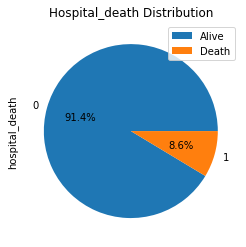

In [ ]:
#Train set- Target 
df['hospital_death'].value_counts().plot(kind='pie',autopct='%1.1f%%', title="Hospital_death Distribution")
plt.legend(("Alive","Death"))
#The pie chart shows the imbalanced dataset with the ratio of 1(Death) : 11 (Alive)
#We will use oversampling to increase the minority class later after encode the categorical predictors.

In [ ]:
#Change the target (hospital_death) from column 3th to the last column
hosdeath = df["hospital_death"]
df.drop("hospital_death",axis=1,inplace=True)
df["hospital_death"]=hosdeath
df

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,...,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0.0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.45,33.0,...,1.3,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.70,12.70,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.000000,37.0,37.000,7.45,7.45,51.0,51.0,51.0,51.0,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,NaN,122.0,703.03,0,0.0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0.0,68.0,NaN,NaN,NaN,NaN,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.7,NaN,203.0,1206.03,1,0.0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1.0,60.0,30.0,30.0,142.0,7.39,4.0,...,1.1,NaN,NaN,43.0,43.0,NaN,NaN,NaN,NaN,8.80,8.80,37.0,27.0,7.44,7.34,337.0,102.0,342.5,236.666667,36.0,33.000,7.37,7.34,337.0,265.0,337.0,337.0,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,0,NaN,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0.0,103.0,NaN,NaN,NaN,NaN,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Acute Care/Floor,Floor,927,admit,Cardiac ICU,0.298611,0,72.9,NaN,113.0,501.06,0,0.0,NaN,NaN,NaN,NaN,4.0,6.0,0.0,5.0,381.0,115.0,NaN,0.0,48.0,NaN,NaN,NaN,NaN,9.0,...,1.1,NaN,NaN,92.0,92.0,4.2,4.2,140.0,140.0,5.68,5.68,48.0,48.0,7.34,7.34,144.0,144.0,NaN,NaN,48.0,48.000,7.34,7.34,144.0,144.0,NaN,NaN,0.12

**TEST SET**

In [ ]:
#Test set- Predictors
print("TEST DATASET")
print("--"*30)
test.info()
print("--"*30)
print("(ROWS, COLUMNS)",test.shape)
print("--"*30)
print(test.columns)
print("--"*30)
test.describe()

TEST DATASET
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39308 entries, 0 to 39307
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(171), int64(7), object(8)
memory usage: 55.8+ MB
------------------------------------------------------------
(ROWS, COLUMNS) (39308, 186)
------------------------------------------------------------
Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=186)
------------------------------------------------------------


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,...,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,39308.000000,39308.000000,39308.000000,0.0,37654.000000,38222.000000,39308.000000,38558.000000,39308.000000,39308.000000,39308.0,38544.000000,14658.000000,38412.000000,38671.000000,39308.000000,39129.000000,14016.000000,32292.000000,32412.000000,9590.000000,38145.000000,38145.000000,38762.000000,38145.000000,34778.000000,39002.000000,31561.000000,39129.000000,39007.000000,9590.000000,9590.000000,9590.000000,9590.000000,38859.000000,32522.000000,35932.000000,24269.000000,39129.000000,30978.000000,...,9054.000000,9054.000000,15488.000000,15488.000000,4418.000000,4418.000000,8516.000000,8516.000000,9884.000000,9884.000000,9439.000000,9439.000000,8539.000000,8539.000000,13533.000000,13533.000000,14037.000000,14037.000000,13975.000000,13975.000000,11333.000000,11333.000000,6845.000000,6845.000000,7127.000000,7127.000000,7052.000000,7052.000000,5322.000000,5322.000000,34130.000000,34130.000000,39129.000000,39129.000000,39129.000000,39129.000000,39129.000000,39129.000000,39129.000000,39129.000000
mean,65346.396891,65504.743462,107.102524,NaN,61.313991,28.947566,0.199908,169.518118,1020.677267,0.829561,0.0,83.266194,2.843310,185.712329,584.282281,0.216572,0.028061,1.329411,25.476898,1.485251,0.595739,3.542928,5.516817,0.015918,4.113514,159.696647,100.197118,32.946640,0.169286,85.283750,42.115647,42.115647,134.054776,7.348349,23.614252,137.898008,36.435611,1910.924935,0.341563,12.310268,...,33.859013,33.623349,1.538802,1.422492,2.963062,2.905888,190.094880,188.894199,4.164225,4.134895,138.002755,137.819896,13.261804,13.183837,45.572279,38.776825,7.384313,7.319174,162.961737,101.687251,291.858876,224.896239,44.280409,43.248097,7.334877,7.327511,160.983778,149.841105,253.938470,247.332789,0.085675,0.039732,0.001431,0.016995,0.195661,0.015027,0.024534,0.007871,0.004319,0.021365
std,37920.612047,37878.696746,64.949586,NaN,16.828987,8.243995,0.399936,10.924032,49.232587,2.538512,0.0,24.872050,0.707919,85.406424,473.550462,0.411913,0.165149,2.743675,20.726131,1.582772,0.262257,0.908975,1.228821,0.125159,1.483078,90.479744,30.497043,6.744971,0.375009,41.558649,12.014444,12.014444,87.801566,0.099758,14.718089,5.358030,0.913549,1464.835586,0.474240,6.959027,...,6.745020,6.832450,0.924830,0.712119,2.843964,2.798316,92.115079,92.431670,0.753872,0.743224,5.638693,5.619606,6.858669,6.832913,14.522729,11.129818,0.087667,0.111557,104.978471,60.750118,134.795334,122.515109,14.645274,13.935707,0.106294,0.110464,110.703514,103.882150,134.173894,132.524123,0.255675,0.236340,0.037804,0.129254,0.396713,0.121663,0.154703,0.088372,0.065578,0.144600
min,2.000000,11.000000,1.000000,NaN,16.000000,14.844926,0.000000,137.200000,906.000000,-82.028472,0.0,38.600000,1.200000,101.000000,0.010000,0.000000,0.00000

In [ ]:
test.dtypes

encounter_id                     int64
patient_id                       int64
hospital_id                      int64
hospital_death                 float64
age                            float64
                                ...   
leukemia                       float64
lymphoma                       float64
solid_tumor_with_metastasis    float64
apache_3j_bodysystem            object
apache_2_bodysystem             object
Length: 186, dtype: object

In [ ]:
#Test set- Target 
#Change the target (hospital_death) from column 3th to the last column
hosdeath = test["hospital_death"]
test.drop("hospital_death",axis=1,inplace=True)
test["hospital_death"]=hosdeath
test

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,...,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,2,127112,7,56.0,21.102439,0,Caucasian,M,180.3,Emergency Department,Accident & Emergency,1105,admit,Neuro ICU,0.104167,0,68.60,3.7,301.0,405.01,0,0.0,NaN,19.0,0.67,NaN,2.0,5.0,0.0,1.0,276.0,105.0,42.0,0.0,57.0,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,NaN
1,5,130737,178,NaN,19.500595,1,Caucasian,F,145.0,Operating Room,Operating Room / Recovery,1043,admit,Med-Surg ICU,0.230556,0,41.00,NaN,217.0,1502.02,1,0.0,NaN,NaN,NaN,NaN,4.0,6.0,0.0,4.0,NaN,60.0,NaN,0.0,53.0,NaN,NaN,NaN,NaN,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,NaN
2,7,101458,86,66.0,32.518596,1,African American,M,170.2,Operating Room,Operating Room / Recovery,1035,admit,CCU-CTICU,0.140972,0,94.20,NaN,302.0,1208.06,1,0.0,NaN,22.0,1.84,NaN,2.0,5.0,0.0,1.0,81.0,124.0,39.2,0.0,115.0,NaN,NaN,NaN,NaN,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN
3,8,48067,163,64.0,20.798520,0,Caucasian,M,182.8,Operating Room,Operating Room / Recovery,1078,admit,Med-Surg ICU,0.002083,0,69.50,1.9,303.0,211.03,0,0.0,0.8,24.0,0.75,0.7,4.0,6.0,0.0,1.0,122.0,111.0,32.0,1.0,48.0,36.0,36.0,142.0,7.35,30.0,...,1.4,NaN,NaN,248.0,248.0,4.0,4.0,133.0,133.0,9.7,9.7,36.0,36.0,7.37,7.35,142.0,57.0,202.857143,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.19,0.17,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN
4,10,25865,59,56.0,NaN,0,Caucasian,M,NaN,Emergency Department,Accident & Emergency,1012,admit,Neuro ICU,0.004861,0,66.40,NaN,217.0,1501.01,1,0.0,NaN,11.0,0.52,NaN,1.0,4.0,0.0,1.0,192.0,94.0,32.8,0.0,41.0,NaN,NaN,NaN,NaN,5.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50,0.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39303,131035,12233,163,35.0,35.038615,1,Caucasian,F,170.2,NaN,Operating Room / Recovery,1082,admit,Neuro ICU,0.411111,0,101.50,NaN,218.0,1505.01,1,0.0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,154.0,57.0,NaN,0.0,127.0,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

## *2.Data Check- Clean and Transformation*

**Features may contain errors and typos**

 We will review a few samples from a smaller dataset may just tell us outright, which features may require correcting.

In [ ]:
df.sample(6)

NameError: ignored

**Handle missing data**

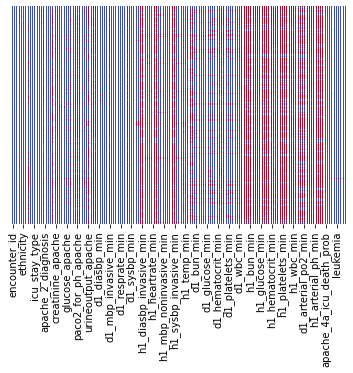

In [ ]:
#Using heatmap to have a initially visual look of misising data distribution
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="coolwarm")
#There are a lot of missing data. 
#Next steps: check the number of missing data in each column 
#then drop the columns which contain > 70% missing data 
#about the remainders, we will replace missing data with the most appearance values for categorical and the median for numeric

In [ ]:
#Set the console bigger
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:20,.2f}'.format)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [ ]:
#Check missing data in every column
df.isnull().sum()

encounter_id                     0    
patient_id                       0    
hospital_id                      0    
age                              4228 
bmi                              3429 
elective_surgery                 0    
ethnicity                        1395 
gender                           25   
height                           1334 
hospital_admit_source            21409
icu_admit_source                 112  
icu_id                           0    
icu_stay_type                    0    
icu_type                         0    
pre_icu_los_days                 0    
readmission_status               0    
weight                           2720 
albumin_apache                   54379
apache_2_diagnosis               1662 
apache_3j_diagnosis              1101 
apache_post_operative            0    
arf_apache                       715  
bilirubin_apache                 58134
bun_apache                       19262
creatinine_apache                18853
fio2_apache              

In [ ]:
#Check the % of missing data in each column
df.isnull().mean()

encounter_id                                    0.00
patient_id                                      0.00
hospital_id                                     0.00
age                                             0.05
bmi                                             0.04
elective_surgery                                0.00
ethnicity                                       0.02
gender                                          0.00
height                                          0.01
hospital_admit_source                           0.23
icu_admit_source                                0.00
icu_id                                          0.00
icu_stay_type                                   0.00
icu_type                                        0.00
pre_icu_los_days                                0.00
readmission_status                              0.00
weight                                          0.03
albumin_apache                                  0.59
apache_2_diagnosis                            

In [ ]:
#Drop all columns which have more 70% missing values (df1 dataframe)
df1=df.loc[:, df.isnull().mean() < .6]
df1

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.00,22.73,0,Caucasian,M,180.30,Floor,Floor,92,admit,CTICU,0.54,0,73.90,2.30,113.00,502.01,0,0.00,31.00,2.51,3.00,6.00,0.00,4.00,168.00,118.00,27.40,0.00,40.00,36.00,134.00,39.30,nan,0.00,14.10,68.00,37.00,68.00,37.00,119.00,72.00,89.00,46.00,89.00,46.00,34.00,10.00,100.00,74.00,131.00,73.00,131.00,73.00,39.90,37.20,68.00,63.00,68.00,63.00,119.00,108.00,86.00,85.00,86.00,85.00,26.00,18.00,100.00,74.00,131.00,115.00,131.00,115.00,39.50,37.50,2.30,2.30,0.40,0.40,31.00,30.00,8.50,7.40,2.51,2.23,168.00,109.00,19.00,15.00,8.90,8.90,27.40,27.40,233.00,233.00,4.00,3.40,136.00,134.00,14.10,14.10,nan,nan,0.10,0.05,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,Sepsis,Cardiovascular,0
1,114252,59342,81,77.00,27.42,0,Caucasian,F,160.00,Floor,Floor,90,admit,Med-Surg ICU,0.93,0,70.20,nan,108.00,203.01,0,0.00,9.00,0.56,1.00,3.00,0.00,1.00,145.00,120.00,36.90,0.00,46.00,33.00,145.00,35.10,nan,1.00,12.70,95.00,31.00,95.00,31.00,118.00,72.00,120.00,38.00,120.00,38.00,32.00,12.00,100.00,70.00,159.00,67.00,159.00,67.00,36.30,35.10,61.00,48.00,61.00,48.00,114.00,100.00,85.00,57.00,85.00,57.00,31.00,28.00,95.00,70.00,95.00,71.00,95.00,71.00,36.30,36.30,1.60,1.60,0.50,0.50,11.00,9.00,8.60,8.00,0.71,0.56,145.00,128.00,27.00,26.00,11.30,11.10,36.90,36.10,557.00,487.00,4.20,3.80,145.00,145.00,23.30,12.70,145.00,143.00,0.47,0.29,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,Respiratory,Respiratory,0
2,119783,50777,118,25.00,31.95,0,Caucasian,F,172.70,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.00,0,95.30,nan,122.00,703.03,0,0.00,nan,nan,3.00,6.00,0.00,5.00,nan,102.00,nan,0.00,68.00,37.00,nan,36.70,nan,0.00,nan,88.00,48.00,88.00,48.00,96.00,68.00,102.00,68.00,102.00,68.00,21.00,8.00,98.00,91.00,148.00,105.00,148.00,105.00,37.00,36.70,88.00,58.00,88.00,58.00,96.00,78.00,91.00,83.00,91.00,83.00,20.00,16.00,98.00,91.00,148.00,124.00,148.00,124.00,36.70,36.70,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Metabolic,Metabolic,0
3,79267,46918,118,81.00,22.64,1,Caucasian,F,165.1

In [ ]:
#For categorical predictors, we will replace null values with the most common class 
#Get all the categorical columns
categorical_pred = df1.select_dtypes(include="object")
print(categorical_pred.columns)
print("--"*30)
categorical_pred.isnull().sum()

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem'], dtype='object')
------------------------------------------------------------


ethnicity                1395 
gender                   25   
hospital_admit_source    21409
icu_admit_source         112  
icu_stay_type            0    
icu_type                 0    
apache_3j_bodysystem     1662 
apache_2_bodysystem      1662 
dtype: int64

In [ ]:
#Fill missing data in categorical columns with the most common class 
categorical_pred1=categorical_pred.apply(lambda x: x.fillna(x.value_counts().index[0]))
categorical_pred1.isnull().sum()


ethnicity                0
gender                   0
hospital_admit_source    0
icu_admit_source         0
icu_stay_type            0
icu_type                 0
apache_3j_bodysystem     0
apache_2_bodysystem      0
dtype: int64

In [ ]:
#Put back the filled categorical columns to df1
df1.drop(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem'],axis=1,inplace=True)
df1=pd.concat([df1,categorical_pred1],axis=1)
df1.isnull().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


encounter_id                     0    
patient_id                       0    
hospital_id                      0    
age                              4228 
bmi                              3429 
elective_surgery                 0    
height                           1334 
icu_id                           0    
pre_icu_los_days                 0    
readmission_status               0    
weight                           2720 
albumin_apache                   54379
apache_2_diagnosis               1662 
apache_3j_diagnosis              1101 
apache_post_operative            0    
arf_apache                       715  
bun_apache                       19262
creatinine_apache                18853
gcs_eyes_apache                  1901 
gcs_motor_apache                 1901 
gcs_unable_apache                1037 
gcs_verbal_apache                1901 
glucose_apache                   11036
heart_rate_apache                878  
hematocrit_apache                19878
intubated_apache         

In [ ]:
#Fill missing data in numeric columns with the median value
#Get all numeric columns
numerical_pred = df1.select_dtypes(exclude="object")
print(numerical_pred.columns)
print("--"*30)
numerical_pred.isnull().sum()

Index(['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi', 'elective_surgery', 'height', 'icu_id', 'pre_icu_los_days', 'readmission_status',
       ...
       'apache_4a_icu_death_prob', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis', 'hospital_death'], dtype='object', length=112)
------------------------------------------------------------


encounter_id                     0    
patient_id                       0    
hospital_id                      0    
age                              4228 
bmi                              3429 
elective_surgery                 0    
height                           1334 
icu_id                           0    
pre_icu_los_days                 0    
readmission_status               0    
weight                           2720 
albumin_apache                   54379
apache_2_diagnosis               1662 
apache_3j_diagnosis              1101 
apache_post_operative            0    
arf_apache                       715  
bun_apache                       19262
creatinine_apache                18853
gcs_eyes_apache                  1901 
gcs_motor_apache                 1901 
gcs_unable_apache                1037 
gcs_verbal_apache                1901 
glucose_apache                   11036
heart_rate_apache                878  
hematocrit_apache                19878
intubated_apache         

In [ ]:
#Fill missing data in numerical columns with the median 
numerical_pred1=numerical_pred.fillna(numerical_pred.median())
numerical_pred1.isnull().sum()


encounter_id                     0
patient_id                       0
hospital_id                      0
age                              0
bmi                              0
elective_surgery                 0
height                           0
icu_id                           0
pre_icu_los_days                 0
readmission_status               0
weight                           0
albumin_apache                   0
apache_2_diagnosis               0
apache_3j_diagnosis              0
apache_post_operative            0
arf_apache                       0
bun_apache                       0
creatinine_apache                0
gcs_eyes_apache                  0
gcs_motor_apache                 0
gcs_unable_apache                0
gcs_verbal_apache                0
glucose_apache                   0
heart_rate_apache                0
hematocrit_apache                0
intubated_apache                 0
map_apache                       0
resprate_apache                  0
sodium_apache       

In [ ]:
#Put back the filled categorical columns to df1
#Drop all float columns first
non_floats = []
for col in df1:
    if df1[col].dtypes == "float64" or df1[col].dtypes == "int64" :
        non_floats.append(col)
df1 = df1.drop(columns=non_floats)
df1=pd.concat([df1,numerical_pred1],axis=1)
df1.isnull().sum()

ethnicity                        0
gender                           0
hospital_admit_source            0
icu_admit_source                 0
icu_stay_type                    0
icu_type                         0
apache_3j_bodysystem             0
apache_2_bodysystem              0
encounter_id                     0
patient_id                       0
hospital_id                      0
age                              0
bmi                              0
elective_surgery                 0
height                           0
icu_id                           0
pre_icu_los_days                 0
readmission_status               0
weight                           0
albumin_apache                   0
apache_2_diagnosis               0
apache_3j_diagnosis              0
apache_post_operative            0
arf_apache                       0
bun_apache                       0
creatinine_apache                0
gcs_eyes_apache                  0
gcs_motor_apache                 0
gcs_unable_apache   

In [ ]:
df1

In [ ]:
#Check the unique value and list of UV
print(df1.nunique())

ethnicity                        6    
gender                           2    
hospital_admit_source            15   
icu_admit_source                 5    
icu_stay_type                    3    
icu_type                         8    
apache_3j_bodysystem             11   
apache_2_bodysystem              10   
encounter_id                     91713
patient_id                       91713
hospital_id                      147  
age                              74   
bmi                              34888
elective_surgery                 2    
height                           401  
icu_id                           241  
pre_icu_los_days                 9757 
readmission_status               1    
weight                           3409 
albumin_apache                   35   
apache_2_diagnosis               44   
apache_3j_diagnosis              399  
apache_post_operative            2    
arf_apache                       2    
bun_apache                       476  
creatinine_apache        

In [ ]:
#Check Unique values for categorical predictors in trainset
for i in categorical_pred1.columns:
  print("({}) Unique_Value {} {}".format(i,df1[i].nunique(),df1[i].unique()))


(ethnicity) Unique_Value 6 ['Caucasian' 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown']
(gender) Unique_Value 2 ['M' 'F']
(hospital_admit_source) Unique_Value 15 ['Floor' 'Emergency Department' 'Operating Room' 'Direct Admit'
 'Other Hospital' 'Other ICU' 'ICU to SDU' 'Recovery Room'
 'Chest Pain Center' 'Step-Down Unit (SDU)' 'Acute Care/Floor' 'PACU'
 'Observation' 'ICU' 'Other']
(icu_admit_source) Unique_Value 5 ['Floor' 'Accident & Emergency' 'Operating Room / Recovery'
 'Other Hospital' 'Other ICU']
(icu_stay_type) Unique_Value 3 ['admit' 'readmit' 'transfer']
(icu_type) Unique_Value 8 ['CTICU' 'Med-Surg ICU' 'CCU-CTICU' 'Neuro ICU' 'MICU' 'SICU'
 'Cardiac ICU' 'CSICU']
(apache_3j_bodysystem) Unique_Value 11 ['Sepsis' 'Respiratory' 'Metabolic' 'Cardiovascular' 'Trauma'
 'Neurological' 'Gastrointestinal' 'Genitourinary' 'Hematological'
 'Musculoskeletal/Skin' 'Gynecological']
(apache_2_bodysystem) Unique_Value 10 ['Cardiovascular' 'Respiratory' 'Metabolic'

In [ ]:
#Check if any columns has zero value
(df1 == 0).sum()

ethnicity                        0    
gender                           0    
hospital_admit_source            0    
icu_admit_source                 0    
icu_stay_type                    0    
icu_type                         0    
apache_3j_bodysystem             0    
apache_2_bodysystem              0    
encounter_id                     0    
patient_id                       0    
hospital_id                      0    
age                              0    
bmi                              0    
elective_surgery                 74862
height                           0    
icu_id                           0    
pre_icu_los_days                 3711 
readmission_status               91713
weight                           0    
albumin_apache                   0    
apache_2_diagnosis               0    
apache_3j_diagnosis              0    
apache_post_operative            73269
arf_apache                       89167
bun_apache                       0    
creatinine_apache        

**Check 0 values which doesn't make sense and replace with the nan -> mean of the columns**

In [ ]:
#Replace all colums having zeros which doesn't make sense with nan 
#New copy dataframe: df1_copy
df1_copy = df1.copy(deep = True)
cols_0_notsense = ['urineoutput_apache','d1_heartrate_min','d1_resprate_min','d1_spo2_max','d1_spo2_min','h1_resprate_min','h1_spo2_max','h1_spo2_min','apache_4a_hospital_death_prob','apache_4a_icu_death_prob']
df1_copy[cols_0_notsense]= df1_copy[cols_0_notsense].replace(0,np.NaN)

In [ ]:
#Impute nan vals for the cols in accordance with their distribution
df1_copy['urineoutput_apache'].fillna(df1_copy['urineoutput_apache'].mean(), inplace=True)
df1_copy['d1_heartrate_min'].fillna(df1_copy['d1_heartrate_min'].mean(), inplace=True)
df1_copy['d1_resprate_min'].fillna(df1_copy['d1_resprate_min'].mean(), inplace=True)
df1_copy['d1_spo2_max'].fillna(df1_copy['d1_spo2_max'].mean(), inplace=True)
df1_copy['d1_spo2_min'].fillna(df1_copy['d1_spo2_min'].mean(), inplace=True)
df1_copy['h1_resprate_min'].fillna(df1_copy['h1_resprate_min'].mean(), inplace=True)
df1_copy['h1_spo2_max'].fillna(df1_copy['h1_spo2_max'].mean(), inplace=True)
df1_copy['h1_spo2_min'].fillna(df1_copy['h1_spo2_min'].mean(), inplace=True)
df1_copy['apache_4a_hospital_death_prob'].fillna(df1_copy['apache_4a_hospital_death_prob'].mean(), inplace=True)
df1_copy['apache_4a_icu_death_prob'].fillna(df1_copy['apache_4a_icu_death_prob'].mean(), inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd84382438>,
      dtype=object)

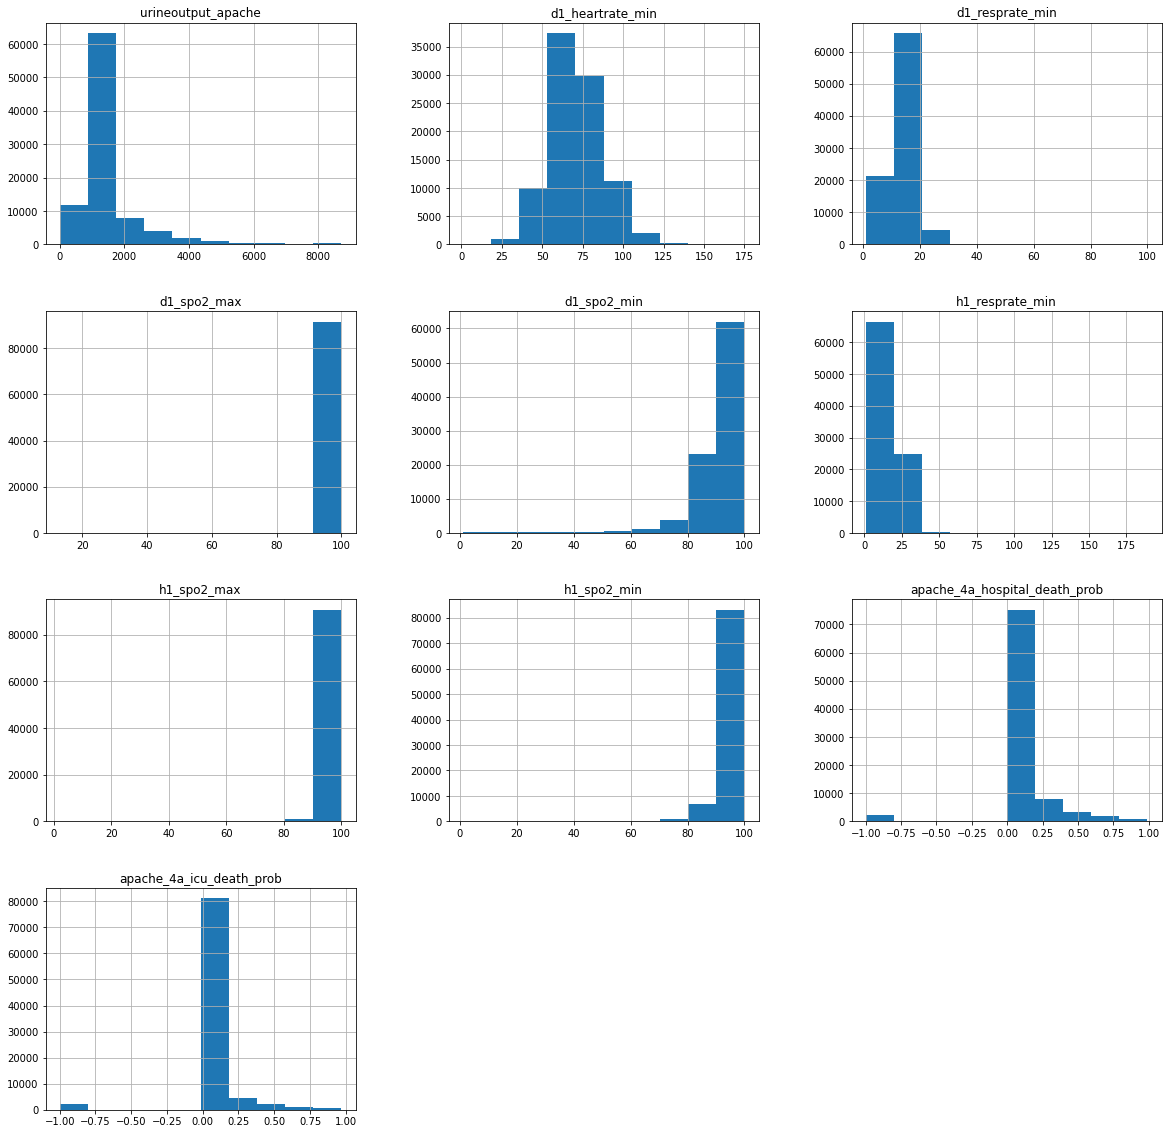

In [ ]:
#Plotting 10 cols after NaN removal

df1_copy[cols_0_notsense].hist(figsize = (20,20))

In [ ]:
# Encoding all categorical data into numeric one 
from sklearn.preprocessing import LabelEncoder # if data is nominal, use LE, if data is ordinal, use OE
categorical_feature_mask = df1_copy.dtypes==object
categorical_cols = df1_copy.columns[categorical_feature_mask].tolist()
print(categorical_cols)
df1_copy[categorical_cols] = df1_copy[categorical_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))
le = LabelEncoder()
df1_copy[categorical_cols] = df1_copy[categorical_cols].astype(str).apply(lambda col: le.fit_transform(col)) 
df1_copy[categorical_cols].head()

['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']


,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,2,1,4,1,0,2,9,0
1,2,0,4,1,0,5,8,6
2,2,0,3,0,0,5,5,3
3,2,0,8,2,0,2,0,0
4,2,1,3,0,0,5,10,7


**Visualization the correlation between X and Y via heatmap, scatter matrix and pairplot**

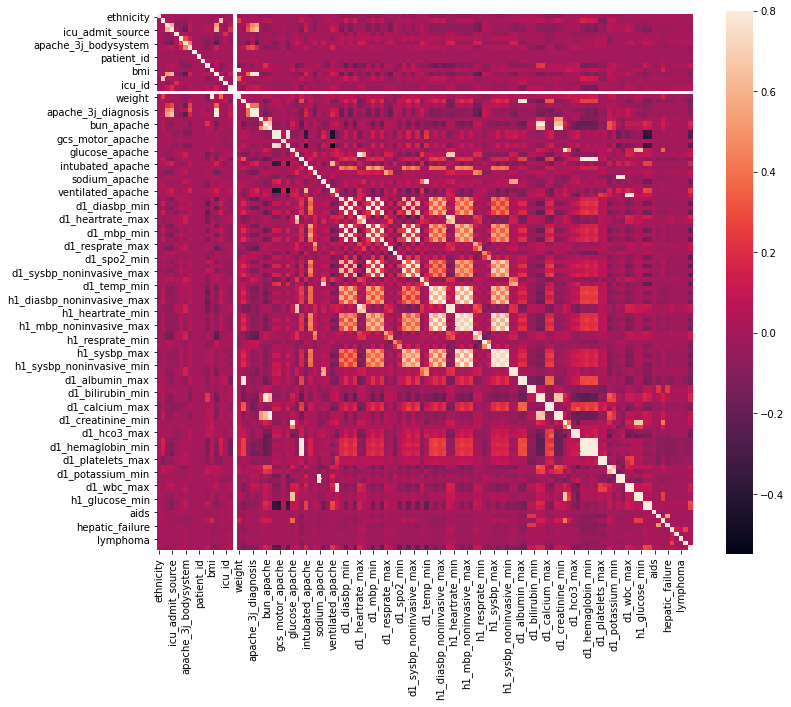

In [ ]:
#Correlataion matrix (heatmap style)
#Zoom heatmap with 10 most correlated values
corrmat = df1_copy.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corrmat, vmax=0.8, square =True)

In [ ]:
# Drop cols that doesn't make sense because it's prediction from another source and we shouldn't rely on that
cols_affect = ['encounter_id','patient_id','hospital_id','readmission_status']
df1_copy.drop(cols_affect, axis=1)

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
0,2,1,4,1,0,2,9,0,68.00,22.73,0,180.30,92,0.54,73.90,2.30,113.00,502.01,0,0.00,31.00,2.51,3.00,6.00,0.00,4.00,168.00,118.00,27.40,0.00,40.00,36.00,134.00,39.30,"1,386.20",0.00,14.10,68.00,37.00,68.00,37.00,119.00,72.00,89.00,46.00,89.00,46.00,34.00,10.00,100.00,74.00,131.00,73.00,131.00,73.00,39.90,37.20,68.00,63.00,68.00,63.00,119.00,108.00,86.00,85.00,86.00,85.00,26.00,18.00,100.00,74.00,131.00,115.00,131.00,115.00,39.50,37.50,2.30,2.30,0.40,0.40,31.00,30.00,8.50,7.40,2.51,2.23,168.00,109.00,19.00,15.00,8.90,8.90,27.40,27.40,233.00,233.00,4.00,3.40,136.00,134.00,14.10,14.10,140.00,134.00,0.10,0.05,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0
1,2,0,4,1,0,5,8,6,77.00,27.42,0,160.00,90,0.93,70.20,2.90,108.00,203.01,0,0.00,9.00,0.56,1.00,3.00,0.00,1.00,145.00,120.00,36.90,0.00,46.00,33.00,145.00,35.10,"1,386.20",1.00,12.70,95.00,31.00,95.00,31.00,118.00,72.00,120.00,38.00,120.00,38.00,32.00,12.00,100.00,70.00,159.00,67.00,159.00,67.00,36.30,35.10,61.00,48.00,61.00,48.00,114.00,100.00,85.00,57.00,85.00,57.00,31.00,28.00,95.00,70.00,95.00,71.00,95.00,71.00,36.30,36.30,1.60,1.60,0.50,0.50,11.00,9.00,8.60,8.00,0.71,0.56,145.00,128.00,27.00,26.00,11.30,11.10,36.90,36.10,557.00,487.00,4.20,3.80,145.00,145.00,23.30,12.70,145.00,143.00,0.47,0.29,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0
2,2,0,3,0,0,5,5,3,25.00,31.95,0,172.70,93,0.00,95.30,2.90,122.00,703.03,0,0.00,19.00,0.98,3.00,6.00,0.00,5.00,133.00,102.00,33.20,0.00,68.00,37.00,138.00,36.70,"1,386.20",0.00,10.40,88.00,48.00,88.00,48.00,96.00,68.00,102.00,68.00,102.00,68.00,21.00,8.00,98.00,91.00,148.00,105.00,148.00,105.00,37.00,36.70,88.00,58.00,88.00,58.00,96.00,78.00,91.00,83.00,91.00,83.00,20.00,16.00,98.00,91.00,148.00,124.00,148.00,124.00,36.70,36.70,3.00,2.90,0.60,0.60,19.00,18.00,8.40,8.20,1.00,0.95,150.00,107.00,24.00,23.00,11.40,10.90,34.50,33.20,196.00,187.00,4.20,3.90,139.00,138.00,11.00,10.10,140.00,134.00,0.09,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
3,2,0,8,2,0,2,0,0,81.00,22.64,1,165.10,92,0.00,61.70,2.90,203.00,"1,206.03",1,0.00,19.00,0.98,4.00,6.00,0.00,5.00,185.00,114.00,25.90,1.00,60.00,4.00,138.00,34.80,"1,386.20",1.00,8.00,48.00,42.00,48.00,42.00,116.00,92.00,84.00,84.00,

In [ ]:
sort_corr = corrmat[['hospital_death']].abs().unstack().sort_values(kind='quicksort', ascending=False)
sort_corr

hospital_death  hospital_death                                  1.00
                apache_4a_hospital_death_prob                   0.30
                gcs_motor_apache                                0.27
                apache_4a_icu_death_prob                        0.27
                gcs_eyes_apache                                 0.25
                gcs_verbal_apache                               0.23
                ventilated_apache                               0.23
                d1_spo2_min                                     0.21
                d1_sysbp_min                                    0.21
                d1_sysbp_noninvasive_min                        0.21
                d1_temp_min                                     0.20
                d1_mbp_min                                      0.19
                d1_mbp_noninvasive_min                          0.19
                d1_diasbp_min                                   0.18
                d1_diasbp_noninvas

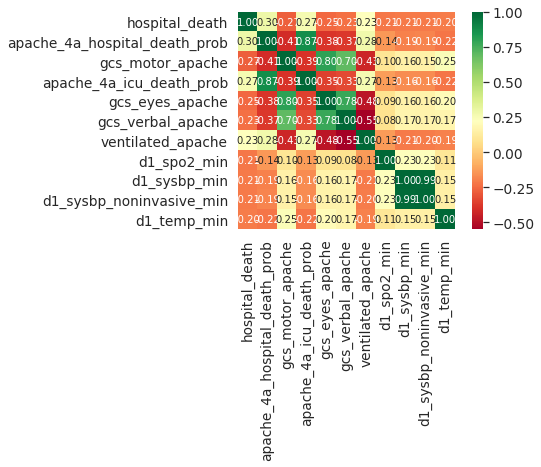

In [ ]:
#hospital_death correlation matriz
k = 11
cols = corrmat.abs().nlargest(k,'hospital_death')['hospital_death'].index
cm = np.corrcoef(df1_copy[cols].values.T)
sns.set(font_scale=1.25)
heatmap = sns.heatmap(cm, cbar=True, square = True, annot=True,fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap ='RdYlGn')
plt.show()

- All X variables (even top 10 most correlated X vars) has low correlation coefficient with Y var
- The heatmap top 10 results is a little bit different with the sorting corr values (given y = hospital_death). Therefore, I will choose top 10 cols to make scatter plot via the sorting results. 
- P/s: Hope team can help me figure out why we have this difference in ranking 



/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


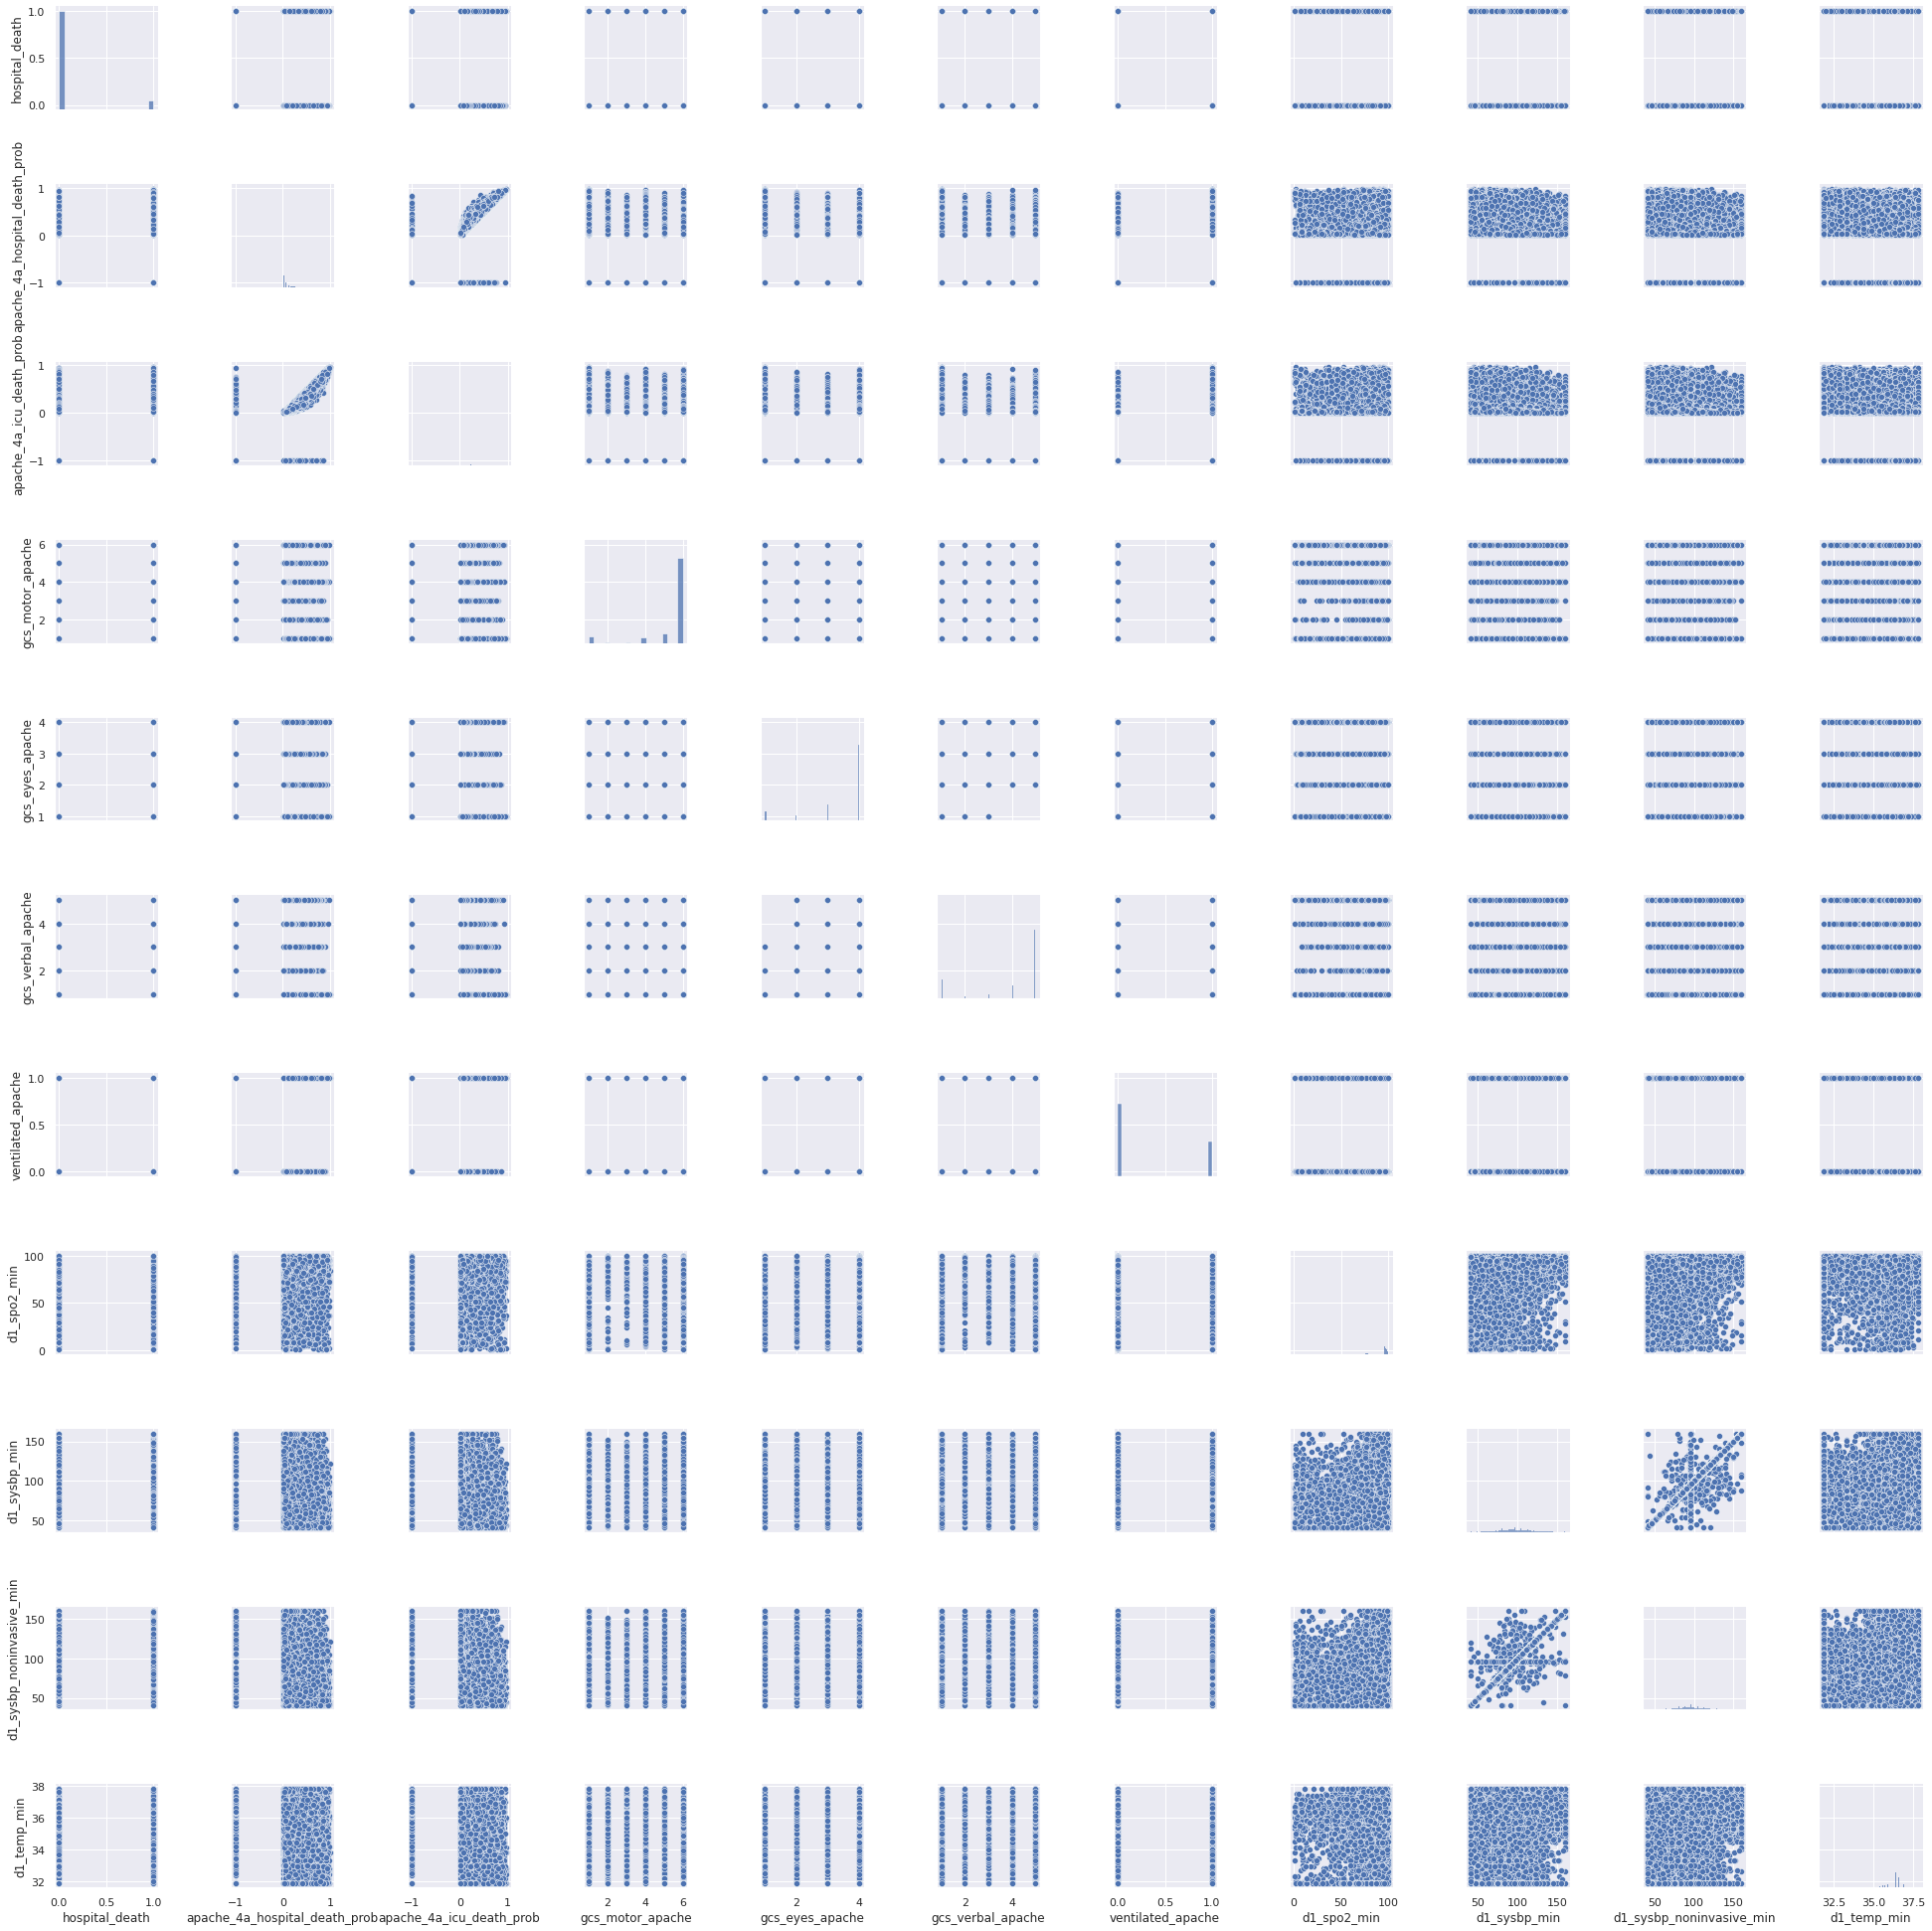

In [ ]:
#Pairplot with top 10 correlated variables
sns.set()
cols = ['hospital_death', 'apache_4a_hospital_death_prob','apache_4a_icu_death_prob','gcs_motor_apache','gcs_eyes_apache','gcs_verbal_apache',
        'ventilated_apache','d1_spo2_min','d1_sysbp_min','d1_sysbp_noninvasive_min','d1_temp_min']
sns.pairplot(df1_copy[cols],size =2.5)
plt.show()

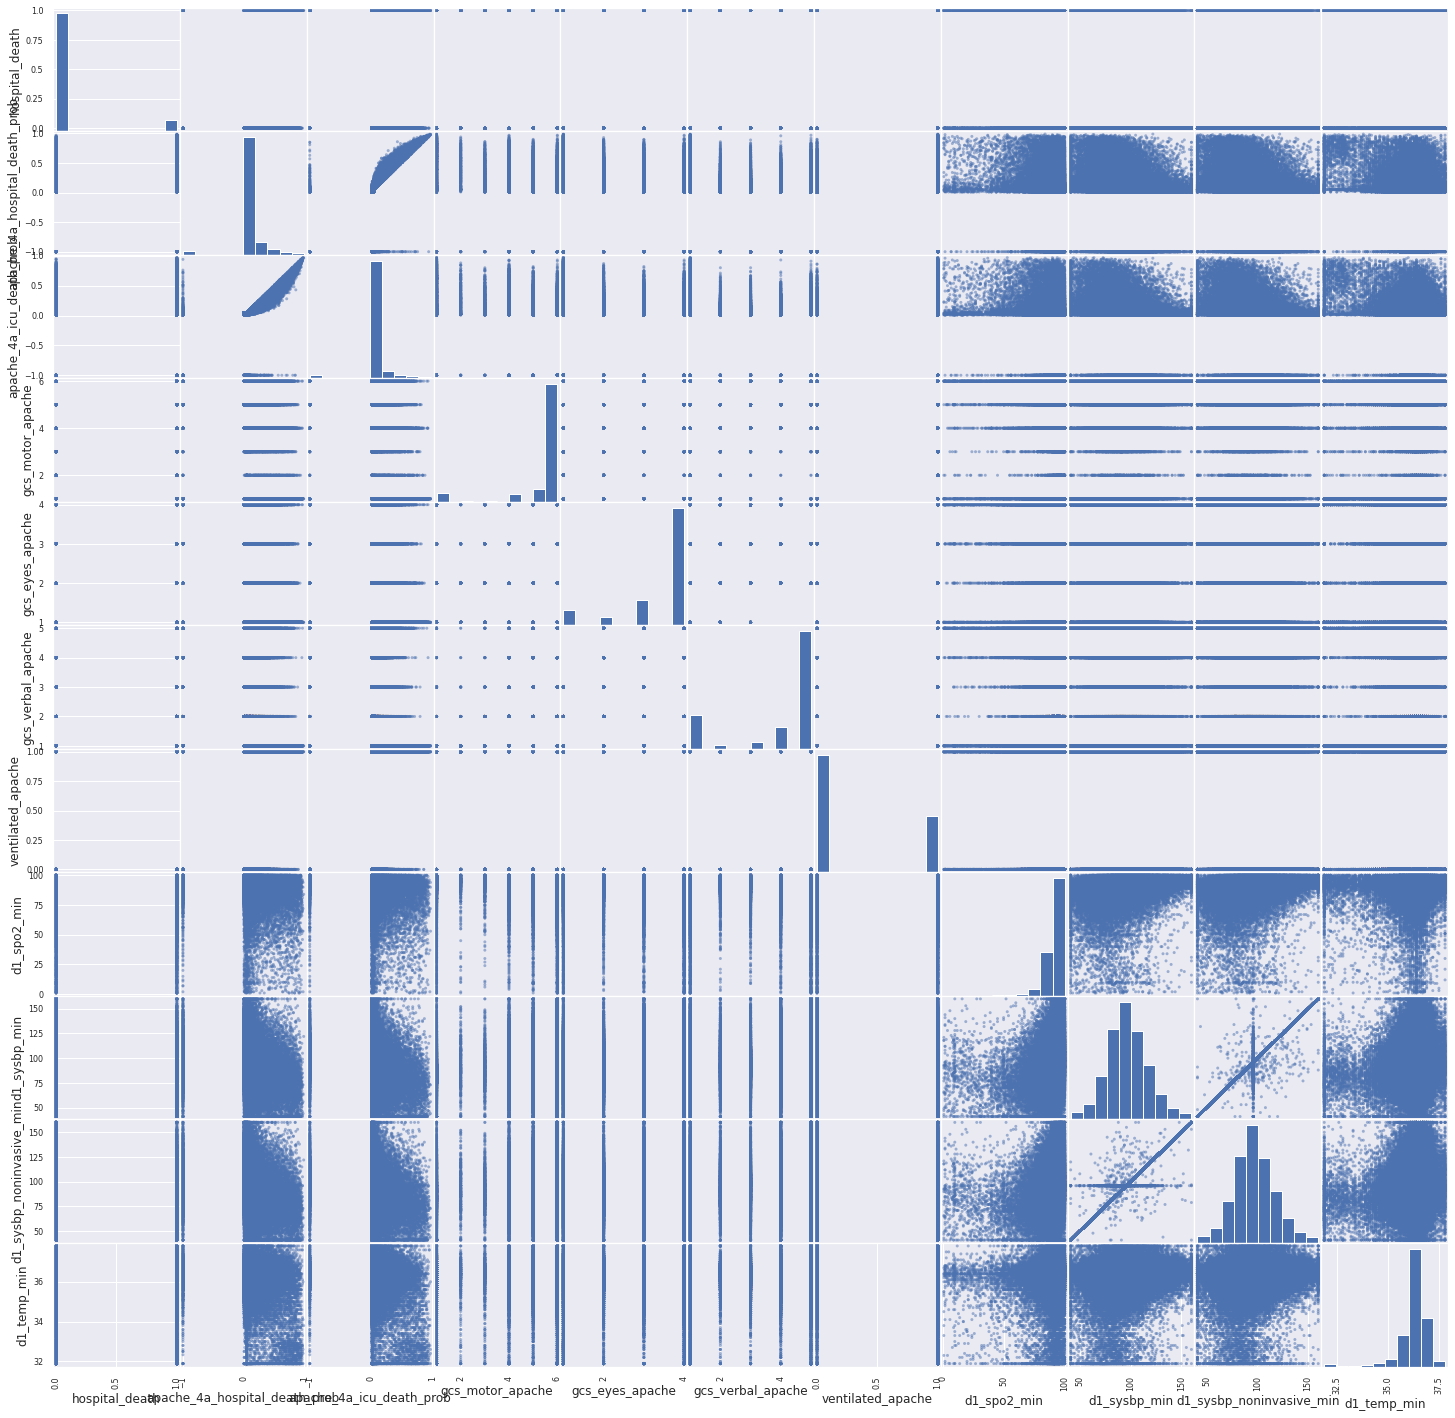

In [ ]:
#scatter matrix for top 10 X variables most correlated with Y 
from pandas.plotting import scatter_matrix
p=scatter_matrix(df1_copy[cols],figsize=(25, 25))

**Normalizing Data**

In [ ]:
#X with 30 most correlated columns to find the best hyperparameter
from sklearn.preprocessing import StandardScaler
hyper_cols = ['apache_4a_hospital_death_prob',               
                'gcs_motor_apache',                               
                'apache_4a_icu_death_prob',                      
                'gcs_eyes_apache',                              
                'gcs_verbal_apache',                             
                'ventilated_apache',                             
                'd1_spo2_min',                                  
                'd1_sysbp_min',                                  
                'd1_sysbp_noninvasive_min',                  
                'd1_temp_min',                                 
                'd1_mbp_min',                                    
                'd1_mbp_noninvasive_min',                    
                'd1_diasbp_min',                           
                'd1_diasbp_noninvasive_min',                     
                'd1_bun_max',                             
                'intubated_apache',                      
                'd1_bun_min',                                    
                'bun_apache',                                     
                'd1_heartrate_max',                          
                'd1_albumin_min',                             
                'temp_apache',                                 
                'd1_hco3_min',                                 
                'h1_sysbp_noninvasive_min',                 
                'h1_sysbp_min',                               
                'h1_mbp_noninvasive_min',                    
                'albumin_apache',                             
                'h1_mbp_min',                            
                'd1_albumin_max',                          
                'd1_wbc_max',                             
                'h1_diasbp_noninvasive_min' ]
X_hyper = df1_copy[hyper_cols]


**Splitting the Dataset & Scaling after splitting**

In [ ]:
y = df1_copy['hospital_death'].values

In [ ]:
#Split the dataset into 70/30 using stratified technique and random_state=7
from sklearn.model_selection import train_test_split
X_hypertrain, X_hypertest, y_train, y_test = train_test_split(X_hyper, y, test_size=0.3, random_state=7)
print ('Train set:', X_hypertrain.shape,  y_train.shape)
print ('Test set:', X_hypertest.shape,  y_test.shape)

Train set: (64199, 30) (64199,)
Test set: (27514, 30) (27514,)


In [ ]:
from sklearn.model_selection import train_test_split
X_hypertrain2, X_hypertest2, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=7)
print ('Train set:', X_hypertrain2.shape,  y_train.shape)
print ('Test set:', X_hypertest2.shape,  y_test.shape)

In [ ]:
#Scaling the Data
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_hypertrain = feature_scaler.fit_transform(X_hypertrain)
X_hypertest = feature_scaler.transform(X_hypertest)

3. Modelling & Predict# New Section

**Import Evaluation Metrices**

In [ ]:
from sklearn.metrics import jaccard_similarity_score, f1_score
# a dictionary for keeping all scores of the classifiers
f1_scores = {'train':{'KNN': 0, 'LR': 0,'RF': 0,'DT': 0},
             'test':{'KNN': 0, 'LR': 0,'RF': 0,'DT': 0}}
jaccard_scores = {'train':{'KNN': 0, 'LR': 0,'RF': 0,'DT': 0}, 
                  'test':{'KNN': 0, 'LR': 0,'RF': 0,'DT': 0}}


**Model 1: K Nearest Neighbor (KNN):**
Find best hyper-parameters to get the KNN model with best accuracy. Print out the KNN's model parameters with the best accuracy (best estimator)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
pip install tune-sklearn scikit-optimize ray[tune]

     |████████████████████████████████| 102kB 4.1MB/s 
     |████████████████████████████████| 48.5MB 91kB/s 
     |████████████████████████████████| 1.3MB 52.2MB/s 
     |████████████████████████████████| 133kB 37.2MB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 204kB 48.3MB/s 
     |████████████████████████████████| 3.2MB 43.6MB/s 
     |████████████████████████████████| 71kB 5.8MB/s 
     |████████████████████████████████| 81kB 7.2MB/s 
     |████████████████████████████████| 317kB 44.9MB/s 
     |████████████████████████████████| 143kB 57.1MB/s 
     |████████████████████████████████| 296kB 40.6MB/s 
     |████████████████████████████████| 61kB 5.2MB/s 
     |████████████████████████████████| 102kB 9.3MB/s 
  Created wheel for gpustat: filename=gpustat-0.6.0-cp36-none-any.whl size=12622 sha256=5a397e81204c13df5efb3969856ec23689968abc70c14f103b45c8762bc0e70a
  Stored in directory: /root/.cache/pip/wheels/48/b4/d5/fb5b7f1d040f2ff206

In [ ]:
from sklearn.datasets import make_classification
import scipy

In [ ]:
#build a parameters grid and try all the possible combinations
#get the best_estimator property for parameters using in our model
#
#'metric':['euclidean', 'manhattan', 'minkowski']
model_KNN = KNeighborsClassifier()

grid_params1 = {'n_neighbors':np.arange(1,10)
    }

grid_search1 = GridSearchCV(
    model_KNN, 
    grid_params1,
    cv=3, scoring ='accuracy',
    n_jobs=-1 )
gs_results1 = grid_search1.fit(X_hypertrain, y_train)  
print("Best parameter:",gs_results1.best_params_)
print("Best estimator:",gs_results1.best_estimator_)
print("Best accuracy (mean accuracy of the scores obtained through cross-validation):",gs_results1.best_score_)

Best parameter: {'n_neighbors': 9}
Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')
Best accuracy (mean accuracy of the scores obtained through cross-validation): 0.9216810208471907


**Applying best hyper-parameter into KNN model:**
- Run the prediction on KNN models on training data and test data 
- Calculate f1_scores and jaccard_scores

In [ ]:
# #Applying best parameters estimator
# knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
#                      metric_params=None, n_jobs=None, n_neighbors=8, p=2,
#                      weights='uniform').fit(X_train, y_train)
# #knn predicting on training data
# y_pred1_train = knn.predict(X_train)
# #knn predicting on test data
# y_pred1_test= knn.predict(X_test)

In [ ]:
# #Print f1 score and jaccard similarity
# f1_scores['train']['KNN']=f1_score(y_train, y_pred1_train)
# f1_scores['test']['KNN']=f1_score(y_test, y_pred1_test)

# jaccard_scores['train']['KNN']=jaccard_similarity_score(y_train, y_pred1_train)
# jaccard_scores['test']['KNN']= jaccard_similarity_score(y_test, y_pred1_test)


In [ ]:
# print('f1_scores:',f1_scores)
# print('jaccard_scores:',jaccard_scores)

**Model 2: Logistic Regression:**
Find best hyper-parameters to get the LR model with best accuracy. Print out the LR's model parameters with the best accuracy (best estimator)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_lr = LogisticRegression()
# 'solver' : ['liblinear', 'saga', 'lbfgs']
#           ,

grid_params2 = {'C' : [0.002, 0.005, 0.01, 0.02],
                'max_iter': [2350, 2400,2500, 2600] }
grid_search2 = GridSearchCV(
    model_lr, 
    grid_params2,  
    cv=3, iid= True,
    scoring ='accuracy',
    n_jobs=-1)
gs_results2 = grid_search2.fit(X_hypertrain, y_train)  
print("Best parameter:",gs_results2.best_params_)
print("Best accuracy (mean accuracy of the scores obtained through cross-validation):",gs_results2.best_score_)
print("Best estimator:",gs_results2.best_estimator_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Best parameter: {'solver': 'liblinear'}
Best accuracy (mean accuracy of the scores obtained through cross-validation): 0.9228648421314973
Best estimator: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


**Applying best hyper-parameter into LR model:**
- Run the prediction on LR models on training data and test data 
- Calculate f1_scores and jaccard_scores

In [ ]:
#Applied best parameters recommended
lr = LogisticRegression(C=0.02, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2350,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False).fit(X_train,y_train)
#lr predicting on training data
y_pred2_train = lr.predict(X_train)
#lr predicting on test data
y_pred2_test= lr.predict(X_test)



In [ ]:
f1_scores['train']['LR']=f1_score(y_train, y_pred2_train)
f1_scores['test']['LR']=f1_score(y_test, y_pred2_test)

jaccard_scores['train']['LR']=jaccard_similarity_score(y_train, y_pred2_train)
jaccard_scores['test']['LR']= jaccard_similarity_score(y_test, y_pred2_test)


In [ ]:
print('f1_scores:',f1_scores)
print('jaccard_scores:',jaccard_scores)

**Model 3:Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier()

grid_params3 = {
    'n_estimator':[200,400],
    'max_features':['auto','sqrt','log2']}

grid_search3 = GridSearchCV(
    model_RFC, 
    grid_params3,  
    cv=3,n_jobs =-1)

gs_results3 = grid_search3.fit(X_train, y_train)  
# print("Best parameter:",gs_results3.best_params_)
print("Best estimator:",gs_results3.best_estimator_)
# print("Best accuracy (mean accuracy of the scores obtained through cross-validation):",gs_results3.best_score_)

**Model 4: Decision Tree**

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
#GridSearchCV to find the best hyperparameters for the models
grid_params4 = {
    'criterion':['gini','entropy'],
    'max_depth': np.arange(3,15),
    'min_samples_split':[2,3,4]}

grid_search4 = GridSearchCV(
    model_dt, 
    grid_params4,  
    cv=3, n_jobs =-1)
gs_results4 = grid_search4.fit(X_train, y_train)  
print("Best parameter:",gs_results4.best_params_)
print("Best estimator:",gs_results4.best_estimator_)
print("Best accuracy (mean accuracy of the scores obtained through cross-validation):",gs_results4.best_score_)

**Applying best hyper-parameter into DT model:**
Run the prediction on DT models on training data and test data
Calculate f1_scores and jaccard_scores

In [ ]:
#Applied best parameters recommended
dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best').fit(X_train,y_train)
#dt predicting on training data
y_pred4_train = dt.predict(X_train)
#dt predicting on test data
y_pred4_test= dt.predict(X_test)

In [ ]:
f1_scores['train']['DT']=f1_score(y_train, y_pred4_train)
f1_scores['test']['DT']=f1_score(y_test, y_pred4_test)

jaccard_scores['train']['DT']=jaccard_similarity_score(y_train, y_pred4_train)
jaccard_scores['test']['DT']= jaccard_similarity_score(y_test, y_pred4_test)

